# Capstone 2 Project - Car Accidents in Iowa

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#### Importing Data
Data was obtained from Iowa Department of Transportation Website

In [199]:
df =pd.read_csv('Vehicle_Accidents_in_Iowa_by_Location__Last_Ten_Years_.csv')

In [200]:
df.shape

(557185, 37)

In [201]:
df.head()

,DOT Case Number,Law Enforcement Case Number,Crash Date & Time,District,County,City,Route,Crash Month,Crash Day,Crash Time,...,Fatalities,Injuries,Major Injuries,Minor Injuries,Possible Injuries,Unknown Injuries,Property Damage,Report Type,Rest Update,Crash Location
0,2011636263,11-1528,06/28/2011 11:38:00 AM,1,POLK,URBANDALE,NaN,June,Tuesday,11:38,...,0,0,0,0,0,0,6500,TraCS,08/14/2018 04:42:27 PM,POINT (-93.73654589797147 41.62922672395549)
1,2011643409,201101827,07/03/2011 09:43:00 PM,1,BOONE,NaN,NaN,July,Sunday,21:43,...,0,0,0,0,0,0,2000,TraCS,08/14/2018 04:42:27 PM,POINT (-93.87429624122426 42.18527185276003)
2,2011641023,11-0088,02/08/2011 07:00:00 PM,1,WEBSTER,NaN,NaN,February,Tuesday,19:00,...,0,0,0,0,0,0,2000,TraCS,08/14/2018 04:42:27 PM,POINT (-94.12854269059548 42.46583138486093)
3,2012684967,NaN,05/04/2012 11:51:00 AM,6,JOHNSON,IOWA CITY,US 6,May,Friday,11:51,...,0,0,0,0,0,0,2599,Officer,08/14/2018 04:42:27 PM,POINT (-91.53210057297697 41.64546030234435)
4,2011642449,NaN,07/27/2011 06:10:00 AM,1,POLK,DES MOINES,NaN,July,Wednesday,06:10,...,0,0,0,0,0,0,3100,Officer,08/14/2018 04:42:27 PM,POINT (-93.62744704200334 41.586315087439765)


In [202]:
df.columns

Index(['DOT Case Number', 'Law Enforcement Case Number', 'Crash Date & Time',
       'District', 'County', 'City', 'Route', 'Crash Month', 'Crash Day',
       'Crash Time', 'Major Cause', 'Crash Manner', 'Crash Severity',
       'Surface Conditions', 'Drug/Alcohol Related', 'Environment', 'Roadway',
       'Light Conditions', 'Weather Conditions', 'Work Zone', 'Paved Road',
       'Roadway Junction', 'First Harmful Event', 'Harmful Event Location',
       'Literal Description', 'Vehicles', 'Occupants', 'Fatalities',
       'Injuries', 'Major Injuries', 'Minor Injuries', 'Possible Injuries',
       'Unknown Injuries', 'Property Damage', 'Report Type', 'Rest Update',
       'Crash Location'],
      dtype='object')

**Looking for duplicate rows**

In [203]:
duplicateRowsDF = df.duplicated()
duplicateRowsDF

0         False
1         False
2         False
3         False
4         False
          ...  
557180    False
557181    False
557182    False
557183    False
557184    False
Length: 557185, dtype: bool

In [204]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

**Computing percentage of missing values in each column and looking at the columns with the most missing values.**

In [205]:
percentage=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
print(percentage.head())

                              percent
Work Zone                    0.987929
Route                        0.593485
City                         0.279584
Law Enforcement Case Number  0.097259
Literal Description          0.006562


Work Zone, Route and City have a high percentage of missing values.

#### Computing missing values

Assumption: If Work Zone information is missing, assuming 'not a Work Zone', setting value to 0. If not null, changing Work Zone value to 1. 

In [206]:
df['Work Zone'].unique()

array([nan, 'Lane closure'], dtype=object)

In [207]:
df['Work Zone'].fillna(0, inplace = True)

In [208]:
df['Work Zone'].replace('Lane closure', int(1),inplace = True)

In [209]:
df['Work Zone'].head()

0    0
1    0
2    0
3    0
4    0
Name: Work Zone, dtype: int64

In [210]:
df['Work Zone'].unique()

array([0, 1])

**Dropping 'Route' and 'City' column due to high % of missing values**


In [211]:
df.drop(['Route', 'City'],axis=1,inplace = True)

In [212]:
df.shape

(557185, 35)

**Dropping meaningless columns**

Dropping features that provide little-to-no meaning




In [182]:
df.drop(['DOT Case Number', 'Law Enforcement Case Number', 'Literal Description', 'Harmful Event Location', 'Report Type', 'Rest Update'],axis=1, inplace=True)

At this point left with 29 features

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557185 entries, 0 to 557184
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Crash Date & Time     557185 non-null  object
 1   District              557185 non-null  int64 
 2   County                557185 non-null  object
 3   Crash Month           557185 non-null  object
 4   Crash Day             557185 non-null  object
 5   Crash Time            557185 non-null  object
 6   Major Cause           557185 non-null  object
 7   Crash Manner          557185 non-null  object
 8   Crash Severity        557185 non-null  object
 9   Surface Conditions    557185 non-null  object
 10  Drug/Alcohol Related  557185 non-null  object
 11  Environment           557185 non-null  object
 12  Roadway               557185 non-null  object
 13  Light Conditions      557185 non-null  object
 14  Weather Conditions    557185 non-null  object
 15  Work Zone        

District, Work Zone, Vehicles, Occupants and Property Damage are int64 dtype and don't require further attention.

Crash Location may need to change format. Will use for mapping in the future

County, Crash Month, Crash Day are categorical, and don't require further attention.

Crash Date and Time, Crash Time - possible Feature Engineering in the future, leaving alone for now.


### Features requiring further investigation

Crash Severity closely related to Fatalities, Injuries, Major Injuries, Minor Injuries, Possible Injuries, Unknown Injuries

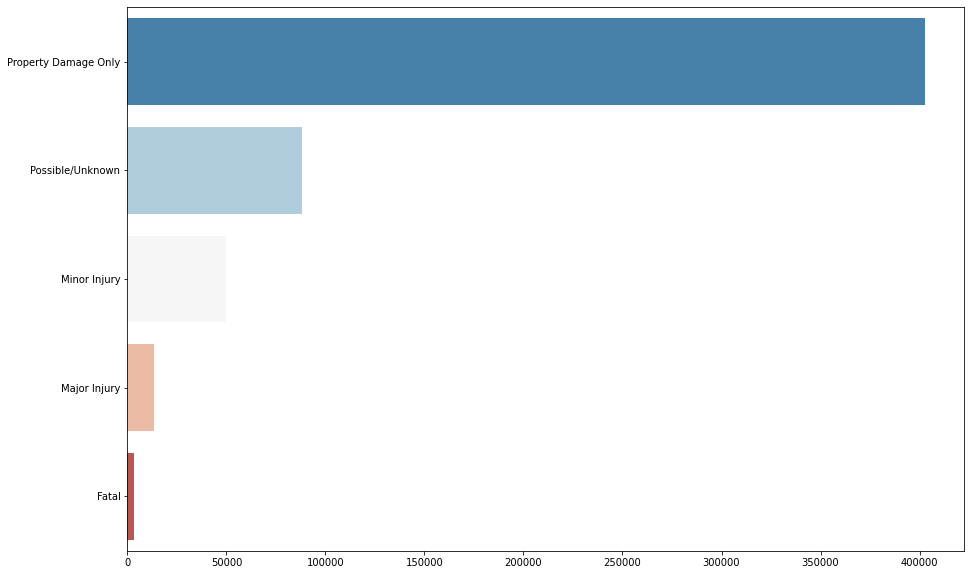

In [255]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Crash Severity'].value_counts())
names = list(x.index)
values = list(x['Crash Severity'])
sns.barplot(x=values, y=names, palette="RdBu_r")

**Some have considerable missing values - not sure what to assume**

In [230]:
(df['Environment']=='Not Reported').sum()/len(df)

0.08581350897816703

~8.6% of 'Environment' values are effectively missing

In [233]:
(df['Roadway']=='Not Reported').sum()/len(df)

0.11133465545554888

~11% of 'Roadway' values are effectively missing

In [236]:
(df['Surface Conditions']=='Not Reported').sum()/len(df)

0.09316474779471809

~9% of 'Surface Conditions' are effectively missing

In [237]:
(df['Light Conditions']=='Not Reported').sum()/len(df)

0.09251146387645037

~9% 'Light Conditions' missing

In [240]:
(df['Weather Conditions']=='Not Reported').sum()/len(df)

0.09352728447463589

~9% 'Weather Conditions' missing

In [242]:
df['Paved Road'].unique()

array(['Paved', 'Unpaved', '0', '9'], dtype=object)

Need to investigate what 0 and 9 mean

In [249]:
#df['Roadway Junction'].unique()

In [250]:
#df['First Harmful Event'].unique()

'Roadway Junction' and 'First Harmful Event' contain many unique values. If I were to use these, need to groupby 'contains'

Not sure what to do about 'Drug/Alcohol'

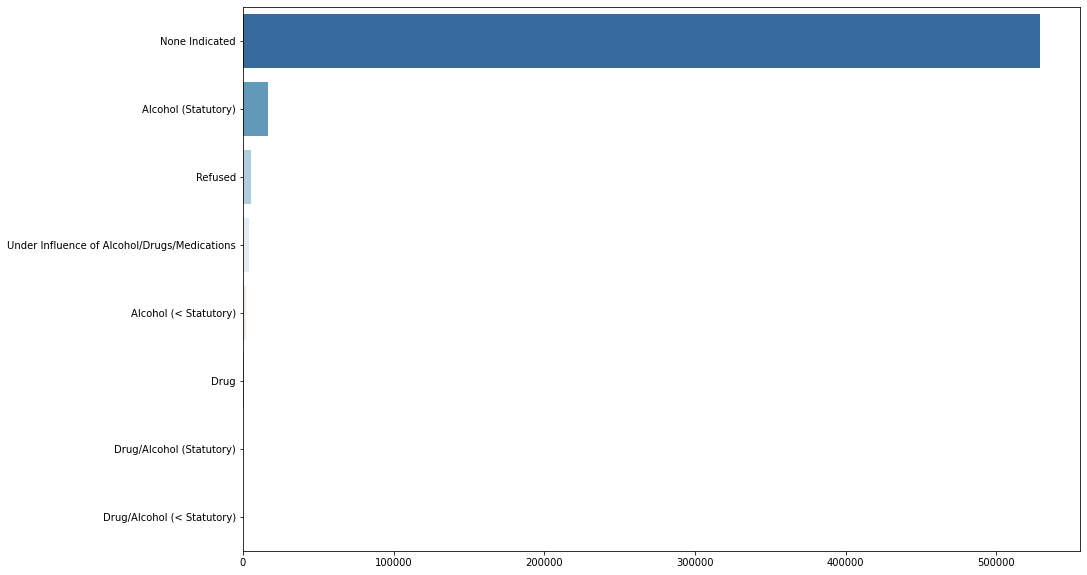

In [251]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Drug/Alcohol Related'].value_counts())
names = list(x.index)
values = list(x['Drug/Alcohol Related'])
sns.barplot(x=values, y=names, palette="RdBu_r")

**'Major Cause' and 'Crash Manner' show some clear major causes**

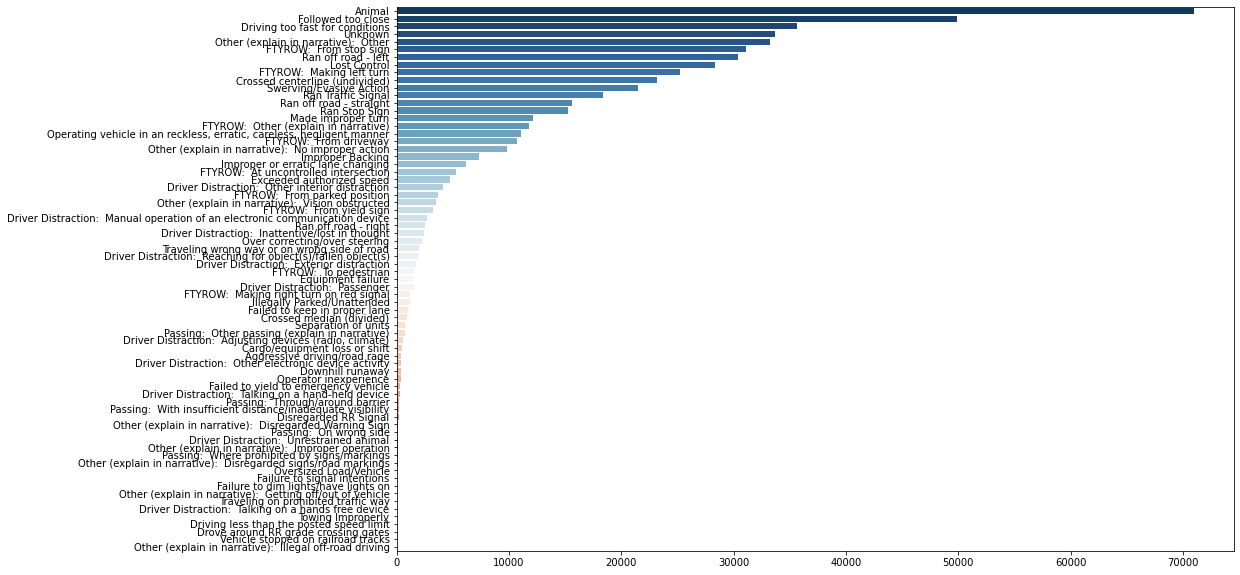

In [253]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Major Cause'].value_counts())
names = list(x.index)
values = list(x['Major Cause'])
sns.barplot(x=values, y=names, palette="RdBu_r")

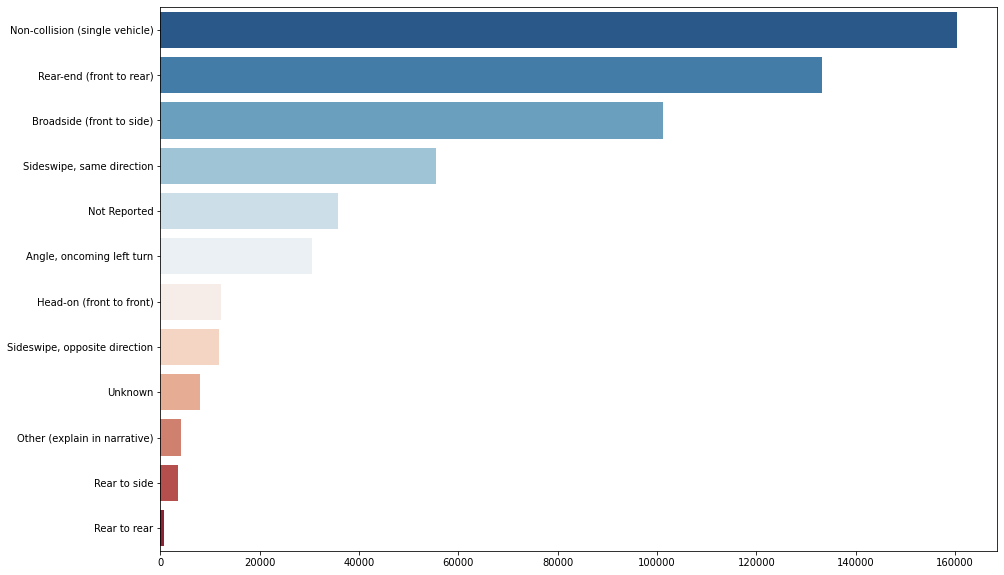

In [254]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Crash Manner'].value_counts())
names = list(x.index)
values = list(x['Crash Manner'])
sns.barplot(x=values, y=names, palette="RdBu_r")

**Exporting df to file**

In [102]:
df.to_csv('DataCleaningOutput.csv')